In [1]:
import requests
import fnmatch
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
# get the content and return a list
def get_content(url):
    # Most websites refuse GET requests from python, so we change the header to pretend we're a browser.
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
    page = requests.get(url, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
home='https://spongebob.fandom.com'
page = get_content('https://spongebob.fandom.com/wiki/List_of_transcripts')

urls=[]
ep=[]
for i, item in enumerate(page.find_all('a')):
    if(str(item.get('href')) == '/wiki/Texas_(voice-over)/transcript'):
        break
    if(str(item.get('href')).endswith('/transcript')):
        ep.append(item.get('title').replace('/transcript',''))
        urls.append(home+item.get('href'))
ep_df= pd.DataFrame(urls)
ep_df.columns=['url']
ep_df['ep']=ep

In [4]:
for r_id ,row in ep_df.iterrows():
    print(row.url)

https://spongebob.fandom.com/wiki/Help_Wanted/transcript
1400
https://spongebob.fandom.com/wiki/Reef_Blower/transcript
1400
https://spongebob.fandom.com/wiki/Tea_at_the_Treedome/transcript
1400
https://spongebob.fandom.com/wiki/Bubblestand/transcript
1400
https://spongebob.fandom.com/wiki/Ripped_Pants/transcript
1400
https://spongebob.fandom.com/wiki/Jellyfishing/transcript
1400
https://spongebob.fandom.com/wiki/Plankton!/transcript
1400
https://spongebob.fandom.com/wiki/Naughty_Nautical_Neighbors/transcript
1400
https://spongebob.fandom.com/wiki/Boating_School/transcript
1400
https://spongebob.fandom.com/wiki/Pizza_Delivery/transcript
1400
https://spongebob.fandom.com/wiki/Home_Sweet_Pineapple/transcript
1400
https://spongebob.fandom.com/wiki/Mermaid_Man_and_Barnacle_Boy/transcript
1400
https://spongebob.fandom.com/wiki/Pickles/transcript
1400
https://spongebob.fandom.com/wiki/Hall_Monitor/transcript
1400
https://spongebob.fandom.com/wiki/Jellyfish_Jam/transcript
1400
https://spongebo

1400
https://spongebob.fandom.com/wiki/Plankton%27s_Holiday_Hits/transcript
1400
https://spongebob.fandom.com/wiki/The_12_Days_of_Nickmas/transcript
1400
https://spongebob.fandom.com/wiki/SpongeBob_%26_You_Save_the_Big_Blue/transcript
1400
https://spongebob.fandom.com/wiki/Educate_and_Activate/transcript
1400
https://spongebob.fandom.com/wiki/Educate_and_Activate_2/transcript
1400
https://spongebob.fandom.com/wiki/Plankton%27s_Diary:_Karen/transcript
1400
https://spongebob.fandom.com/wiki/Plankton%27s_Diary:_Evil_Laugh/transcript
1400
https://spongebob.fandom.com/wiki/Plankton%27s_Diary:_Plankton%27s_Evil_Plan/transcript
1400
https://spongebob.fandom.com/wiki/SpongeBob_Checks_His_Instaclam/transcript
1400
https://spongebob.fandom.com/wiki/Patrick_Star_Checks_His_Instaclam/transcript
1400
https://spongebob.fandom.com/wiki/SpongeBob_Checks_His_Snapper_Chat/transcript
1400
https://spongebob.fandom.com/wiki/Fish_Food_Rescue:_The_Krusty_Krab/transcript
1400
https://spongebob.fandom.com/wiki

In [5]:
page = get_content('https://spongebob.fandom.com/wiki/Reef_Blower/transcript')

for r_id ,row in ep_df.iterrows():
    #print(row.url)
    #print(i)
    page = get_content(row.url)
    for i, item in enumerate(page.find_all('li')):
        #if str(item.get_text()).startswith(''):
        if '\t\t\tHistory' in (str(item.get_text())):
            start=i
        if('forum-thread' in str(item.get('class'))):
            end=i

    lines=[]
    for item in page.find_all('li')[start+1:end]:
        if not (item.get_text().startswith('[')):
            lines.append(item.get_text())

    char=[]
    text=[]
    for item in lines:
        temp=item.split(':')
        char.append(temp[0])
        temp=' '.join(temp[1:]).replace('\n','')
        text.append(re.sub("[\[].*?[\]]", "", temp))

    if len(char) != 0:
        ln_df = pd.DataFrame(char)
        ln_df.columns=['char']
        ln_df['text']=text
        ln_df['ep']=row.ep 
        if r_id==0:
            df=ln_df.copy()
            print('start')
        else:
            df=df.append(ln_df, ignore_index=True)
            if(r_id%10==0): 
                print(r_id)

start
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570


In [6]:
df

,char,text,ep
0,French Narrator,"Ah, the sea... so fascinating. So wonderful. ...",Help Wanted
1,SpongeBob,"Today's the big day, Gary.",Help Wanted
2,Gary,Meow.,Help Wanted
3,SpongeBob,"Look at me, I'm... ...naked! Gotta be in t...",Help Wanted
4,Gary,Meow.,Help Wanted
5,SpongeBob,"I'm ready! I'm ready, I'm ready, I'm ready,...",Help Wanted
6,Patrick,"Go, SpongeBob! Whoa!",Help Wanted
7,SpongeBob,There it is. The finest eating establishment...,Help Wanted
8,Patrick,Where do you think you're going?,Help Wanted
9,SpongeBob,I was just...,Help Wanted


In [7]:
df=df.drop(df[df['char']==''].index).copy()
df=df.drop(df[df['text']==''].index).copy()
df=df.drop(df[df['text']==' '].index).copy()
df

,char,text,ep
0,French Narrator,"Ah, the sea... so fascinating. So wonderful. ...",Help Wanted
1,SpongeBob,"Today's the big day, Gary.",Help Wanted
2,Gary,Meow.,Help Wanted
3,SpongeBob,"Look at me, I'm... ...naked! Gotta be in t...",Help Wanted
4,Gary,Meow.,Help Wanted
5,SpongeBob,"I'm ready! I'm ready, I'm ready, I'm ready,...",Help Wanted
6,Patrick,"Go, SpongeBob! Whoa!",Help Wanted
7,SpongeBob,There it is. The finest eating establishment...,Help Wanted
8,Patrick,Where do you think you're going?,Help Wanted
9,SpongeBob,I was just...,Help Wanted


In [8]:
df.to_csv('spongebob.csv')

In [9]:
testdf=df.copy()

In [10]:
exceptions=['Long, tan and handsome Anchovy leader', "Astronaut Inside SpongeBob and Patrick's Box",
            "Policeman Inside SpongeBob and Patrick's box",'Customer with mask and money bag',
            "SpongeBob's Friends and Co.", 'Bangles and Dangles manager','SpongeBob and Patrick BFF Ring']

crowd = ['All except MM and BB', 'All But Mr. Krabs and Squidward', 'All [But SpongeBob]',
        "All of SpongeBob's friends", "SpongeBob's Friends and Co.", 'Everyone except Squidward']

ns = [' and ', ' & ']


ch=[]
tx=[]
ep=[]

for i, row in df.iterrows():
    if row.char not in exceptions:
        row.char=str(row.char).strip()
        row.text=str(row.text).strip()

        # get rid of 'Both ()' in characters
        if 'Both (' in row.char:
            row.char = row.char.replace('Both (','').replace(')','')

        # transform 'all except' and 'all but' in 'Crowd'
        if row.char in crowd:
            row.char = 'Crowd'

        # check if character contain comma and split them in single characters
        if ',' in row.char:
            flag=', and' in row.char or ', & ' in row.char

            chars = str(row.char).split(',')
            row.char= chars[0]
            for c in chars[1:-1]:
                ch.append(c)
                tx.append(row.text)
                ep.append(row.ep)

            for n in ns:
                if n in chars[-1]:
                    chars = chars[-1].split(n)
                    ch.append(chars[1])
                    tx.append(row.text)
                    ep.append(row.ep)

            if not flag:
                ch.append(chars[0])
                tx.append(row.text)
                ep.append(row.ep)

        else:    
            for n in ns:
                if n in row.char:
                    chars = str(row.char).split(n)
                    row.char = chars[0]

                    ch.append(chars[1])
                    tx.append(row.text)
                    ep.append(row.ep)


In [11]:
clean_df = pd.DataFrame(ch)
clean_df.columns= ['char']
clean_df['text']=tx
clean_df['ep']=ep
df = df.append(clean_df)
df

,char,text,ep
0,French Narrator,"Ah, the sea... so fascinating. So wonderful. H...",Help Wanted
1,SpongeBob,"Today's the big day, Gary.",Help Wanted
2,Gary,Meow.,Help Wanted
3,SpongeBob,"Look at me, I'm... ...naked! Gotta be in top...",Help Wanted
4,Gary,Meow.,Help Wanted
5,SpongeBob,"I'm ready! I'm ready, I'm ready, I'm ready, I...",Help Wanted
6,Patrick,"Go, SpongeBob! Whoa!",Help Wanted
7,SpongeBob,There it is. The finest eating establishment e...,Help Wanted
8,Patrick,Where do you think you're going?,Help Wanted
9,SpongeBob,I was just...,Help Wanted


In [12]:
remove = ['SpongeBob E.O.T.M Awards', 'The SpongeBob Movie', 'Harry Potter', 'Stranger Things']

for i, row in df.iterrows():
    row.char=str(row.char).strip()
    # check some comments that leaked in
    if '\t' in row.char or row.char in remove:
        row.char=''

df=df.drop(df[df['char']==' '].index).copy()
df=df.drop(df[df['char']==''].index).copy()
for c in df.char.unique():
    print(c+';')

French Narrator;
SpongeBob;
Gary;
Patrick;
Squidward;
Mr. Krabs;
Bus driver;
Anchovy;
Anchovies;
Sandy;
Narrator;
Larry;
Fish;
Scooter;
Lou Vendor;
Lou;
Harold;
Perch Perkins;
Lifeguard;
Pants;
Jennifer;
Dexter;
Frank;
All;
Both;
Sheldon J. Plankton;
Plankton;
Woman in the recording;
Karen Plankton;
SpongeBob Bubble;
Patrick Bubble;
Squidward Bubble;
Gus;
Mrs. Puff;
Fred;
Truck Driver;
Nematodes;
Nematode #1;
TV Announcer;
Mermaid Man;
Villain;
Manager;
Barnacle Boy;
Cafeterian;
Clay;
John;
Bubble Bass;
Unknown Anchovy;
Martha;
Billy;
Unnamed fish;
Shubie;
Customer;
Jimmy;
Phil;
Tina;
Student;
Vera;
Newspaper Boy;
Officer Rob;
Officer John;
Officer Durado;
Officer #1;
Jellyfish;
Everyone else;
Pearl;
Squeaky Boots;
Francis;
Tom;
Realtor Lady;
Patty;
Lisa;
Mr Krabs;
Crowd;
Mrs. SquarePants;
Mr. SquarePants;
Cowboy;
Policeman;
Karen;
Clams;
Movie Man;
TV;
Bartender;
Announcer;
Measurer;
Crowd Attendee;
Judy;
Friend;
Brian;
Octavius;
Painter;
Angry crowd;
Long, tan and handsome Anchovy le

In [13]:
# group alias
keep = ["Policeman Inside SpongeBob and Patrick's box","Astronaut Inside SpongeBob and Patrick's Box",
        'SpongeBob and Patrick BFF Ring', 'SpongeBob Bubble', 'Patrick Bubble', 'Squidward Bubble', 
        "Squidward's Cousin", "Squidward's house", 'Long, tan and handsome Anchovy leader', "Plankton's Cellmates",
        "Sandy's Cousin", 'Fake Mermaid Man', "Larry's #1 Fan", "Nathiel Waters", 'Frederick Nitpick', "Fred's dad",
       'Harold SquarePants', "Pearl's friend", 'Frank (muscular goldfish)', 'Frank (lifeguard)', "Frankie's wife",
       'Frankie Billy']

names = {'SpongeBob':'SpongeBob', 
         'Patrick':'Patrick', 
         'Squidward':'Squidward', 
         'Mr. Krabs':'Mr. Krabs', 
         'Narrator':'Narrator', 
         'Pearl': 'Pearl',
         'Anchov':'Anchovy', 
         'Officer':'Officers', 
         'Police':'Officers', 
         'Karen':'Karen', 
         'Grandma Plankton':'Lily Plankton', 
         'Plankton':'Plankton', 
         'Sandy':'Sandy', 
         'Kid':'Kids', 
         'Gary':'Gary',
         'Mrs. Puff':'Mrs. Puff', 
         'Mermaid Man':'Mermaid Man', 
         'Larry':'Larry', 
         'Lary':'Lary', 
         'Barnacle':'Barnacle Boy', 
         'Nathiel':'Nathiel Waters', 
         'Nat': 'Nat Peterson', 
         'Fred':'Fred', 
         'Dutchman':'The Flying Dutchman',
         'Mrs. SquarePants':'Margaret SquarePants', 
         'Mr. SquarePants':'Harold SquarePants', 
         'Harold':'Harold',
         'Old Man Jenkin':'Old Man Jenkins',
         'Potty':'Potty the Parrot',
         'Man Ray': 'Man Ray',
         'Frankie': 'Frankie Billy',
         'Frank': 'Frank'}
    
for i, row in df.iterrows():
    # Replace alias by name
    for key, val in names.items():
        if key in row.char and row.char not in keep:
            row.char=val
df.char.unique()

array(['Narrator', 'SpongeBob', 'Gary', ..., 'his wife', 'Hoodsey',
       'Gerald'], dtype=object)

In [14]:
for c in df.char.unique():
    if 'Frank' in c:
        print(c)

Frank
Frankie's wife
Frankie Billy
Frank (lifeguard)
Frank (muscular goldfish)


In [19]:
df.to_csv('spongebob.csv', encoding='utf-16', sep=';')

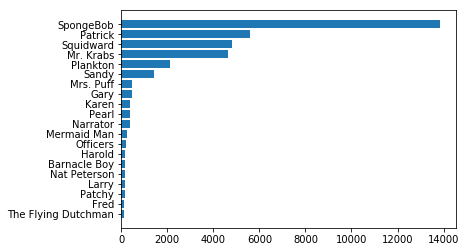

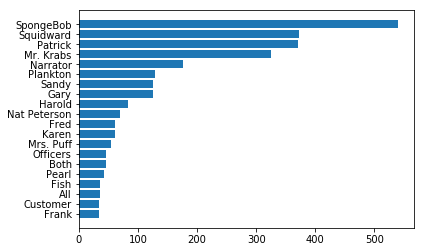

In [41]:
import matplotlib.pyplot as plt

lines=df.groupby(by='char')['text'].count().sort_values(ascending=False)[:20]
episodes=df.groupby(by='char')['ep'].nunique().sort_values(ascending=False)[:20]
lines=lines.sort_values()
episodes=episodes.sort_values()

plt.barh(lines.index, lines.values)
plt.show()
plt.barh(episodes.index, episodes.values)
plt.show()
#plt.xticks(rotation=90)

In [27]:
df.groupby(by='char')['ep'].nunique().sort_values(ascending=False)[:20]

char
SpongeBob       539
Squidward       372
Patrick         370
Mr. Krabs       325
Narrator        176
Plankton        129
Sandy           125
Gary            125
Harold           83
Nat Peterson     69
Fred             62
Karen            61
Mrs. Puff        55
Officers         46
Both             46
Pearl            42
Fish             36
All              36
Customer         34
Frank            34
Name: ep, dtype: int64